# Data Visualization - Summary Statistics

This file is for describing our data, producing summary statistics and visulazing them.
Specifically, we have:
- Summary stats and visualization for hotel characteristics
- Summary stats and visualization for hotel ratings/reviews/revenue

In [1]:
import csv
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("DataForAnalysis/hoteldata_sample2.csv", index_col= 0,encoding='ISO-8859-1')

In [3]:
df.head()

,publishedAtDate,title,address,city,state,totalScore,additionalInfo,reviewsCount,reviewsDistribution,hotelStars,...,Taxable_Receipts,hotelid,freeWifi,freeBreakfast,freeParking,pool,restaurant,fitnessCenter,revenue,T
0,2023-11-01,Sheraton Dallas Hotel,"400 Olive St, Dallas, TX 75201",Dallas,Texas,4.2,"{'Amenities': [{'Free Wi-Fi': True}, {'Breakfa...",5918.0,"{'oneStar': 308, 'twoStar': 242, 'threeStar': ...",4-star hotel,...,4407394.0,251.0,True,NaN,NaN,NaN,True,True,15.440556,0
1,2023-10-01,Sheraton Dallas Hotel,"400 Olive St, Dallas, TX 75201",Dallas,Texas,4.2,"{'Amenities': [{'Free Wi-Fi': True}, {'Breakfa...",5918.0,"{'oneStar': 308, 'twoStar': 242, 'threeStar': ...",4-star hotel,...,6235523.0,251.0,True,NaN,NaN,NaN,True,True,15.652235,0
2,2023-09-01,Sheraton Dallas Hotel,"400 Olive St, Dallas, TX 75201",Dallas,Texas,4.2,"{'Amenities': [{'Free Wi-Fi': True}, {'Breakfa...",5918.0,"{'oneStar': 308, 'twoStar': 242, 'threeStar': ...",4-star hotel,...,6077681.0,251.0,True,NaN,NaN,NaN,True,True,15.621185,0
3,2023-08-01,Sheraton Dallas Hotel,"400 Olive St, Dallas, TX 75201",Dallas,Texas,4.2,"{'Amenities': [{'Free Wi-Fi': True}, {'Breakfa...",5918.0,"{'oneStar': 308, 'twoStar': 242, 'threeStar': ...",4-star hotel,...,4320492.0,251.0,True,NaN,NaN,NaN,True,True,15.321711,0
4,2023-07-01,Sheraton Dallas Hotel,"400 Olive St, Dallas, TX 75201",Dallas,Texas,4.2,"{'Amenities': [{'Free Wi-Fi': True}, {'Breakfa...",5918.0,"{'oneStar': 308, 'twoStar': 242, 'threeStar': ...",4-star hotel,...,5280868.0,251.0,True,NaN,NaN,NaN,True,True,15.480553,0


__Summary Statistics (Guanhong)__ 

In [4]:
unique_df = df.drop_duplicates(subset=['title'])
unique_df.head()

,publishedAtDate,title,address,city,state,totalScore,additionalInfo,reviewsCount,reviewsDistribution,hotelStars,...,Taxable_Receipts,hotelid,freeWifi,freeBreakfast,freeParking,pool,restaurant,fitnessCenter,revenue,T
0,2023-11-01,Sheraton Dallas Hotel,"400 Olive St, Dallas, TX 75201",Dallas,Texas,4.2,"{'Amenities': [{'Free Wi-Fi': True}, {'Breakfa...",5918.0,"{'oneStar': 308, 'twoStar': 242, 'threeStar': ...",4-star hotel,...,4407394.00,251.0,True,NaN,NaN,NaN,True,True,15.440556,0
35,2023-11-01,Hilton Anatole,"2201 N Stemmons Fwy, Dallas, TX 75207",Dallas,Texas,4.3,"{'Amenities': [{'Free Wi-Fi': True}, {'Paid br...",8359.0,"{'oneStar': 490, 'twoStar': 304, 'threeStar': ...",4-star hotel,...,4087985.86,22.0,True,NaN,NaN,NaN,True,True,15.253524,0
70,2023-11-01,Hyatt Regency Dallas,"300 Reunion Blvd, Dallas, TX 75207",Dallas,Texas,4.5,"{'Amenities': [{'Free Wi-Fi': True}, {'Paid br...",8723.0,"{'oneStar': 233, 'twoStar': 171, 'threeStar': ...",4-star hotel,...,2899261.42,80.0,True,NaN,NaN,NaN,True,True,14.973156,1
105,2023-11-01,Omni Dallas Hotel,"555 S Lamar St, Dallas, TX 75202, United States",Dallas,Texas,4.5,"{'Amenities': [{'Wi-Fi': True}, {'Paid breakfa...",8810.0,"{'oneStar': 346, 'twoStar': 185, 'threeStar': ...",4-star hotel,...,4224213.72,117.0,NaN,NaN,NaN,NaN,True,NaN,15.268239,0
140,2023-11-01,Hyatt Regency DFW International Airport,"Dallas Fort Worth International Airport, 2334 ...",Dallas,Texas,4.3,"{'Amenities': [{'Free Wi-Fi': True}, {'Paid br...",3978.0,"{'oneStar': 142, 'twoStar': 129, 'threeStar': ...",4-star hotel,...,1989963.41,363.0,True,NaN,True,NaN,True,True,14.834121,1


In [5]:
unique_df["freeWifi"].value_counts()

freeWifi
True    116
Name: count, dtype: int64

In [6]:
unique_df["restaurant"].value_counts()

restaurant
True     78
False    30
Name: count, dtype: int64

In [7]:
unique_df["fitnessCenter"].value_counts()

fitnessCenter
True     84
False    34
Name: count, dtype: int64

In [8]:
# Summarize 'hotelStars'
unique_df["hotelStars"].value_counts()

hotelStars
3-star hotel    40
2-star hotel    26
4-star hotel    25
5-star hotel     6
1-star hotel     5
Name: count, dtype: int64

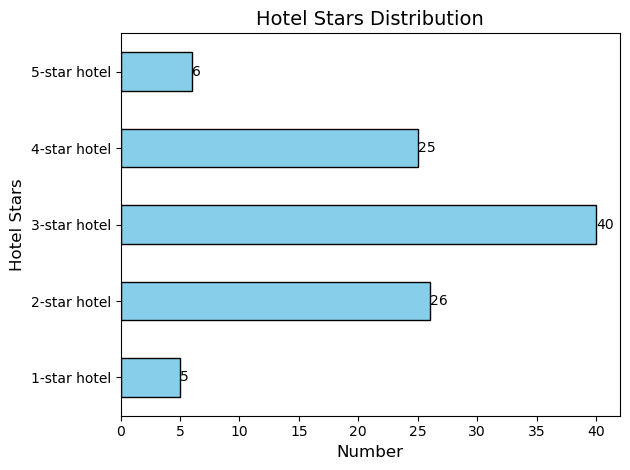

In [9]:
# Count the occurrences of each 'hotelStars' category
hotel_stars_counts = unique_df["hotelStars"].value_counts().sort_index()

# Create the horizontal bar plot
fig, ax = plt.subplots()
hotel_stars_counts.plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

# Add labels and title with larger font size
ax.set_xlabel('Number', fontsize=12)
ax.set_ylabel('Hotel Stars', fontsize=12)
ax.set_title('Hotel Stars Distribution', fontsize=14)

# Add the counts beside the bars
for i, count in enumerate(hotel_stars_counts):
    ax.text(count, i, str(count), ha='left', va='center')

# Remove x-axis gridlines
ax.xaxis.grid(False)

# Apply tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
# Summarize 'UnitCapacity'
unique_df["Unit_Capacity"].value_counts()

Unit_Capacity
150.0    5
14.0     4
128.0    4
40.0     4
130.0    4
        ..
250.0    1
252.0    1
256.0    1
258.0    1
78.0     1
Name: count, Length: 84, dtype: int64

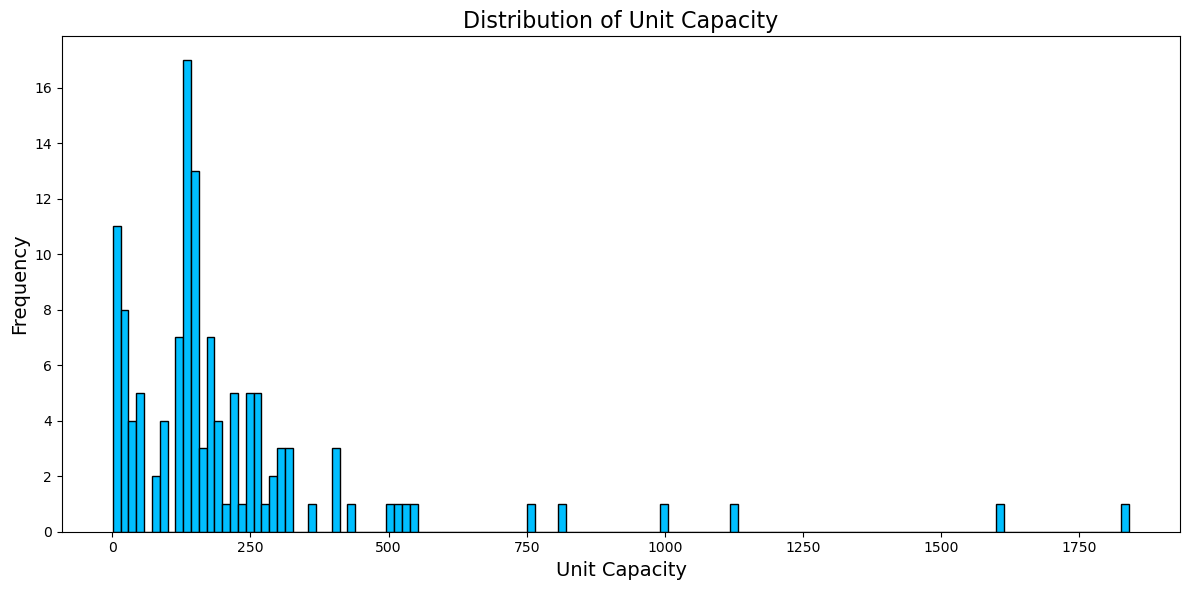

In [11]:
# Using the functional approach with figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram using the axes object
ax.hist(unique_df["Unit_Capacity"], bins=130, color="deepskyblue", edgecolor='black')

# Set the title and labels using the axes object
ax.set_title('Distribution of Unit Capacity', fontsize=16)
ax.set_xlabel('Unit Capacity', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Remove y-axis gridlines using the axes object
ax.yaxis.grid(False)

# Improve layout to ensure the labels and title are properly shown
plt.tight_layout()

# Display the plot
plt.show()



In [12]:
# Summarize the "df"

# Select the target items
summary_statistics = df[["Total_Room_Receipts", "actual_stars", "present_stars", "reviewCumSum", "reviewLength"]].describe()

# Rename the index for better clarity
summary_statistics.rename(index={'mean': 'Mean', 'std': 'Std', 'min': 'Min', 'max': 'Max'}, inplace=True)

# Rename the columns
summary_statistics.columns = ["Hotel Revenue", "Acutal Rating", "Observed Rating", "Review Count", "Review Length"]

# Delete unnecessary rows
rows_to_drop = summary_statistics.index[[0, 4, 5, 6]]
summary_statistics = summary_statistics.drop(rows_to_drop)

# Display the results
summary_statistics

,Hotel Revenue,Acutal Rating,Observed Rating,Review Count,Review Length
Mean,6.359951e+05,3.869982,3.869852,1150.070294,155.492509
Std,9.383271e+05,0.539406,0.541181,1446.939576,142.988007
Min,4.566600e+02,1.000000,1.000000,3.000000,0.000000
Max,8.911956e+06,5.000000,5.000000,8724.000000,1667.500000


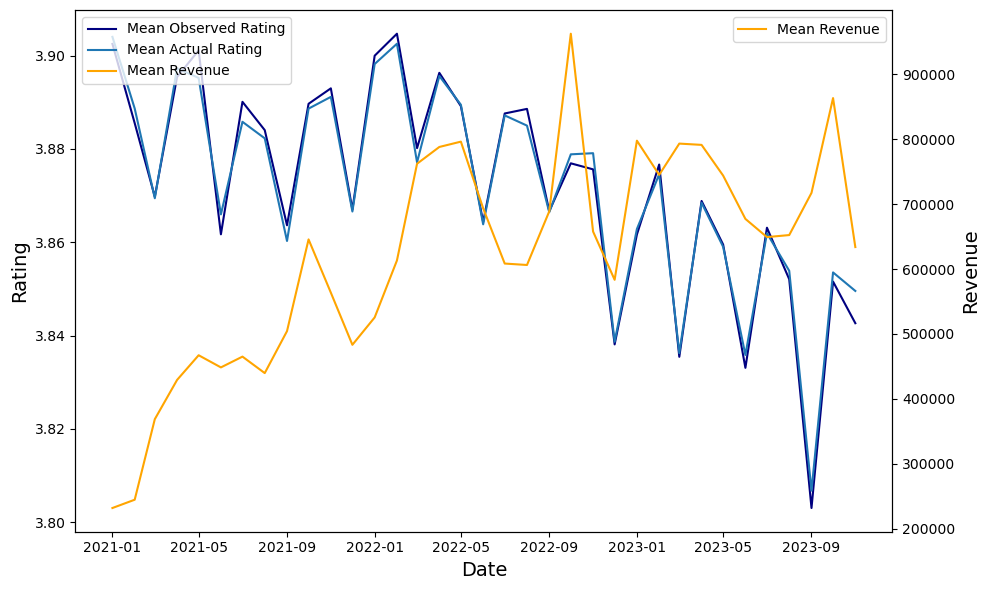

In [13]:
# Timeframe line chart
df_plot = df
df_plot = df_plot[df_plot["Total_Room_Receipts"] != 0]
df_plot['publishedAtDate'] = pd.to_datetime(df_plot['publishedAtDate'])
grouped_df = df_plot.groupby('publishedAtDate').agg({
    'present_stars': 'mean',
    'actual_stars': 'mean',
    'Total_Room_Receipts': 'mean'
}).reset_index()

# Using the functional approach with figure and axes objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mean present and actual stars
sns.lineplot(data=grouped_df, x='publishedAtDate', y='present_stars', label='Mean Observed Rating', color='navy', ax=ax1)
sns.lineplot(data=grouped_df, x='publishedAtDate', y='actual_stars', label='Mean Actual Rating', ax=ax1)

# Setup the legend for the first axis
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Rating', fontsize=14)

# Create a second y-axis for revenue using the same figure (fig) and the twinx method
ax2 = ax1.twinx()
sns.lineplot(data=grouped_df, x='publishedAtDate', y='Total_Room_Receipts', ax=ax2, color='orange', label='Mean Revenue')
ax2.set_ylabel('Revenue', fontsize=14)

# Manually adding the second legend to include both legends together
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Removing duplicates from the legend
unique_labels = {}
for line, label in zip(lines_1 + lines_2, labels_1 + labels_2):
    if label not in unique_labels:
        unique_labels[label] = line
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left')

plt.tight_layout()
plt.show()


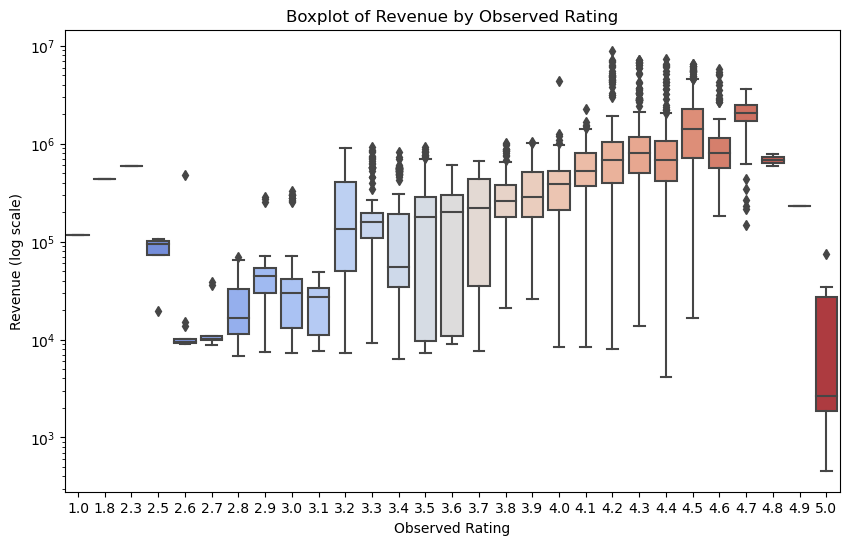

In [14]:
# Boxplot 1: Without specific range of present stars

import seaborn as sns
import matplotlib.pyplot as plt

# Create figure and axis objects using the functional approach
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot with more vivid colors using the "bright" palette
sns.boxplot(x='present_stars', y='Total_Room_Receipts', data=df, ax=ax, palette="coolwarm")

# Set the title and labels using the axis object
ax.set_title('Boxplot of Revenue by Observed Rating')
ax.set_xlabel('Observed Rating')
ax.set_ylabel('Revenue (log scale)')

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Display the plot
plt.show()





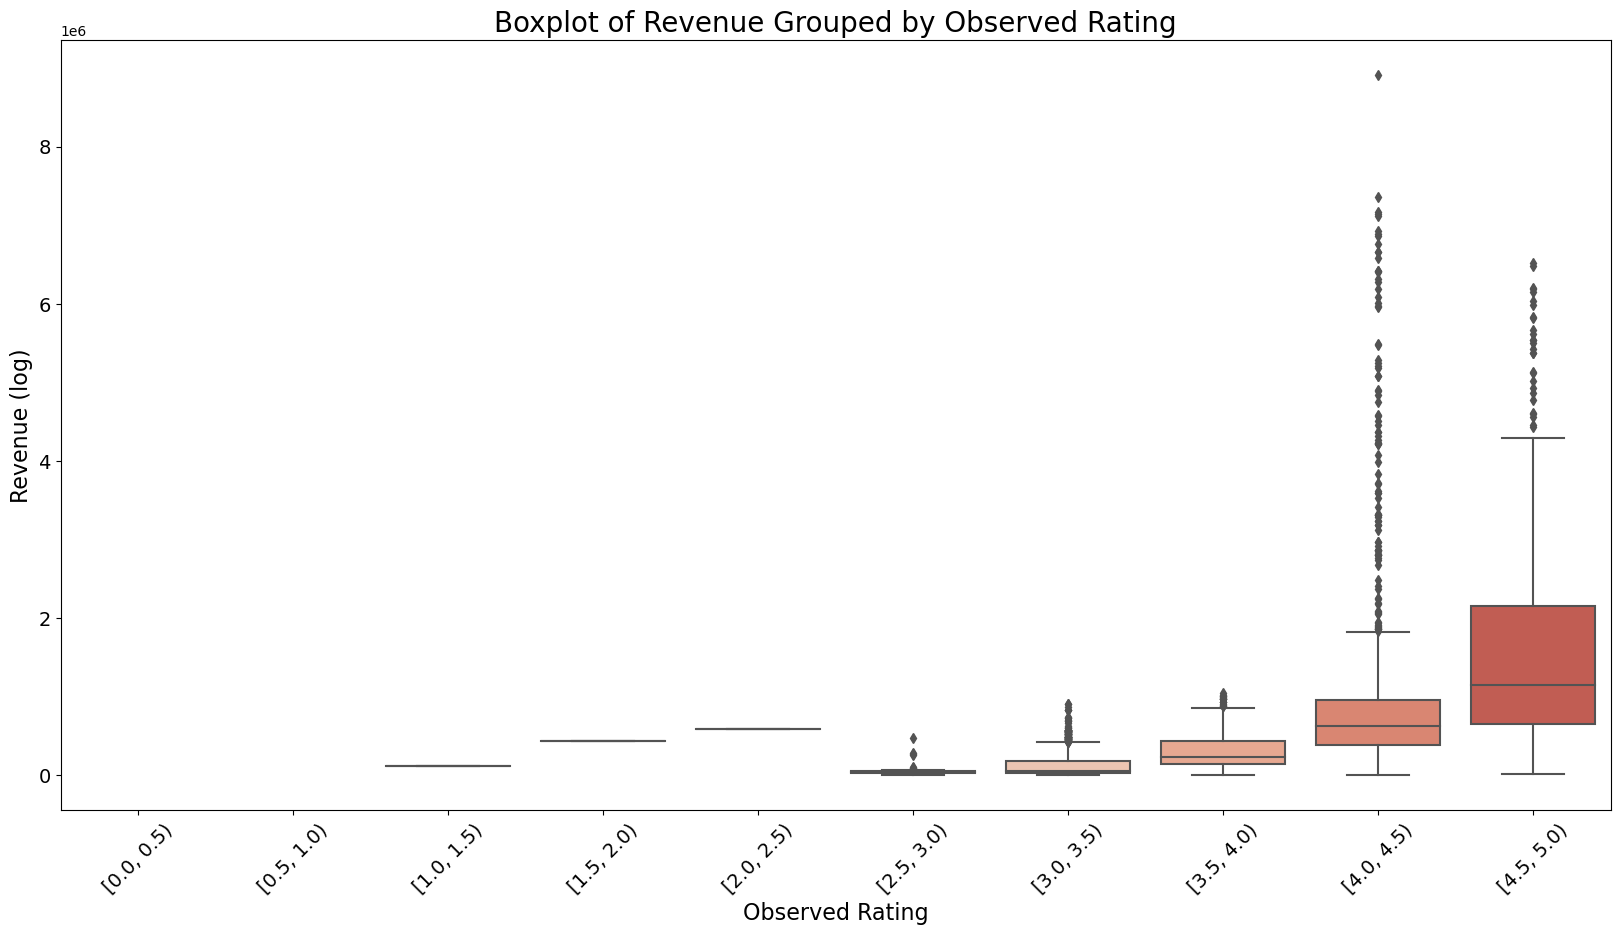

In [15]:
# Boxplot 2: With specific range of present stars

# Using the functional approach with figure and axes objects
fig, ax = plt.subplots(figsize=(20, 10))

# Set the range for grouping
bins = [i * 0.5 for i in range(11)]

# Group the "present_stars" using the pandas cut function
df['present_stars_group'] = pd.cut(df['present_stars'], bins=bins, right=False)

# Create the boxplot with seaborn, setting ax to the axes object we just created
sns.boxplot(x='present_stars_group', y='Total_Room_Receipts', data=df, width=0.8, ax=ax, palette="coolwarm")

# Set the title and labels using the axes object
ax.set_title('Boxplot of Revenue Grouped by Observed Rating', fontsize=20)
ax.set_xlabel('Observed Rating', fontsize=16)
ax.set_ylabel('Revenue (log)', fontsize=16)

# Set the x-ticks and y-ticks font sizes using the axes object
ax.tick_params(axis='x', rotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Show the plot
plt.show()


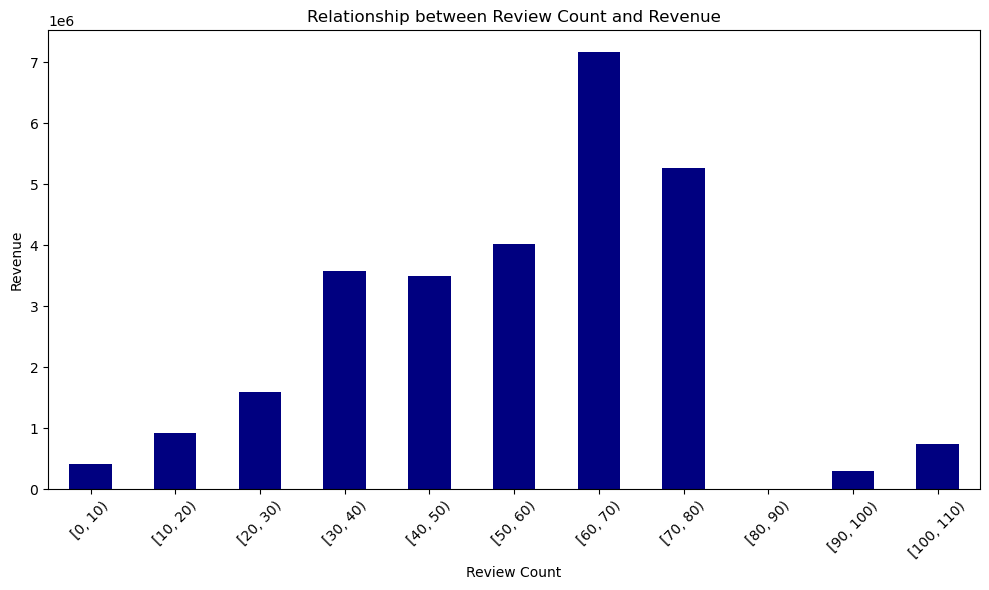

In [16]:
# Histogram


# Using the functional approach with figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Process missing values, replacing missing values with mean values
df['reviewContained'].fillna(df['reviewContained'].mean(), inplace=True)

# Group the reviewContained using the pandas cut function
df['reviewContained_group'] = pd.cut(df['reviewContained'], 
                                     bins=range(0, int(df['reviewContained'].max()) + 10, 10), 
                                     right=False)

# Calculate the mean of TotalRoomReceipts in each group
grouped_data = df.groupby('reviewContained_group')['Total_Room_Receipts'].mean()

# Plot the bar plot using the axes object we just created
grouped_data.plot(kind='bar', color='navy', ax=ax)  

# Set the title and labels using the axes object
ax.set_title('Relationship between Review Count and Revenue')
ax.set_xlabel('Review Count')
ax.set_ylabel('Revenue')

# Rotate x-ticks using the axes object
ax.tick_params(axis='x', rotation=45)

# Disable y-axis grid using the axes object
ax.yaxis.grid(False)

# Apply tight layout and show the plot
plt.tight_layout()
plt.show()


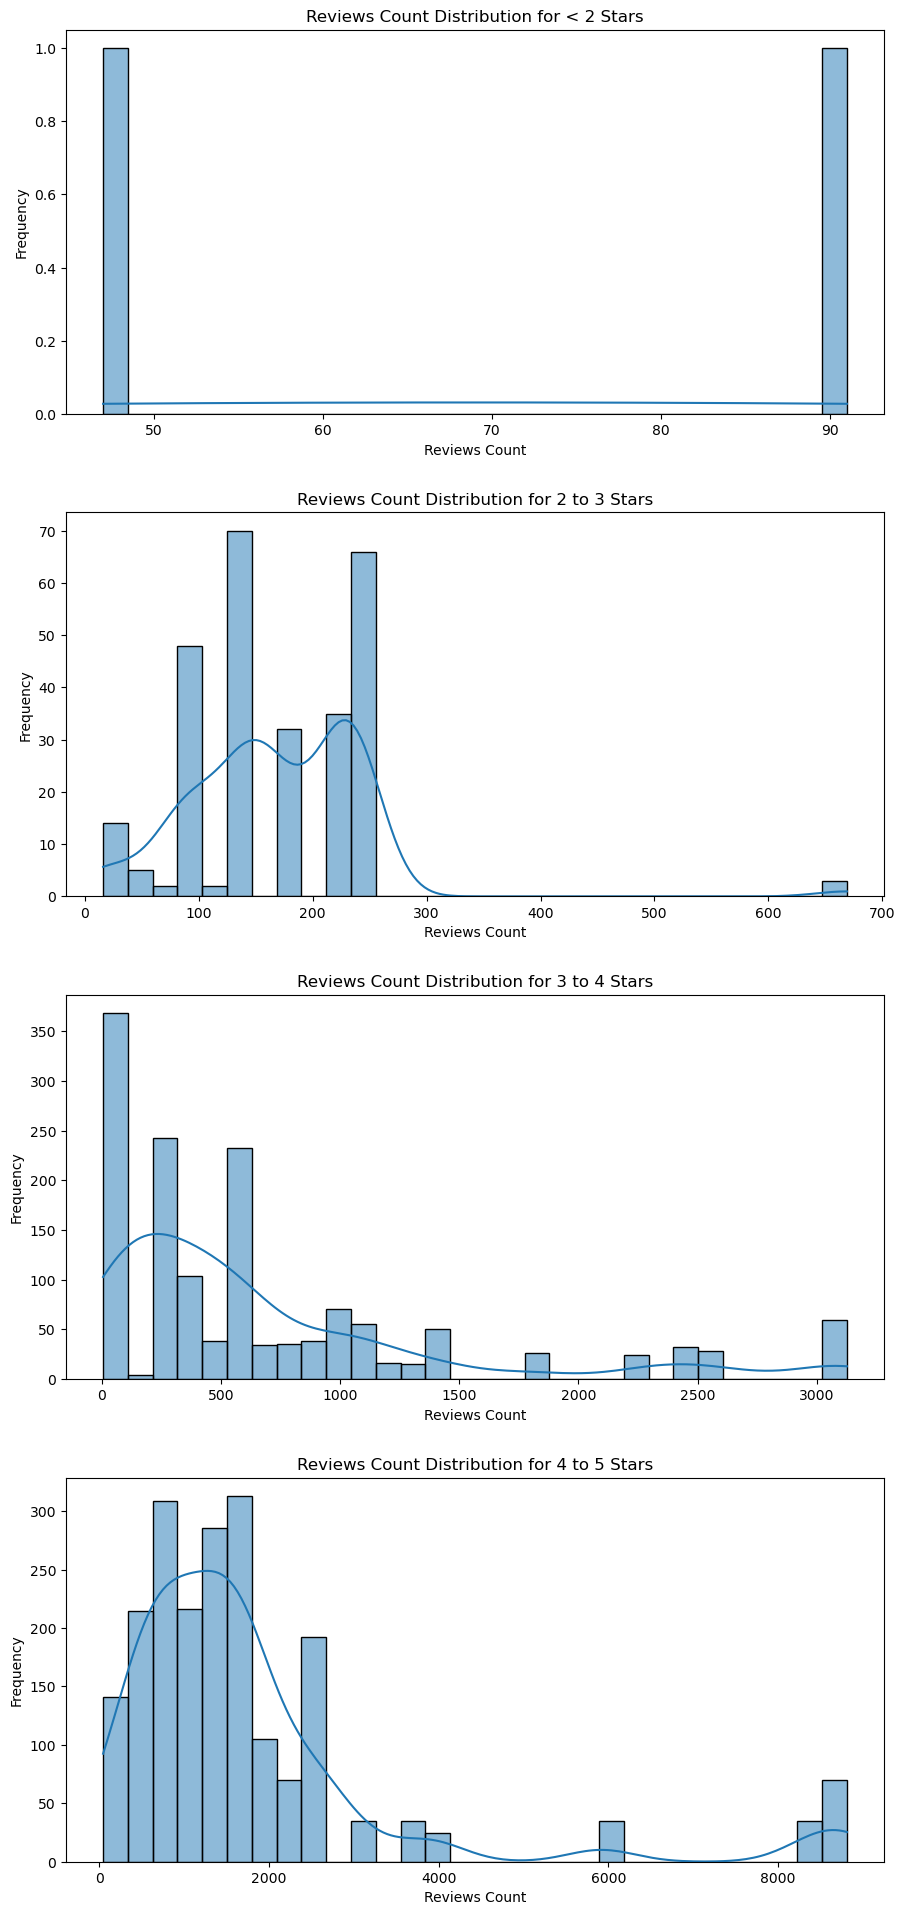

In [17]:
# Review count distribution at different present stars
# Define the bins for the subplots
bins = [0, 2, 3, 4, 5]

# Create subplots
fig, axes = plt.subplots(len(bins)-1, 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

# Generate subplots for each bin range
for i in range(len(bins)-1):
    min_star = bins[i]
    max_star = bins[i+1]
    if i == 0:
        # For reviews less than 2
        subset = df[df['present_stars'] < 2]
        title = "Reviews Count Distribution for < 2 Stars"
    else:
        subset = df[(df['present_stars'] >= min_star) & (df['present_stars'] < max_star)]
        title = f"Reviews Count Distribution for {min_star} to {max_star} Stars"
    
    sns.histplot(subset['reviewsCount'], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(title)
    axes[i].set_xlabel('Reviews Count')
    axes[i].set_ylabel('Frequency')

plt.show()